In [22]:
import pandas as pd
import networkx as nx

In [23]:
videos = pd.read_json("../shared-folder-gald/data/video-creators.json")

In [24]:
videos.head()

,username,video_description,region_code,share_count,hashtag_names,id,like_count,music_id,view_count,voice_to_text,comment_count,create_time,cluster,cluster-label,playlist_id,effect_ids
0,the.animal.holocaust,Replying to @ov10bronco #dominicizrealmyers #v...,US,4,"[vegan, yes, bbq, meat, carnivore, govegan, ve...",7274212644502998314,40,7.274213e+18,1054,"You say, why torture yourself? Because all we ...",181.0,2023-09-02 13:00:37,10,Healthy Cooking,NaN,NaN
1,bakemehealthylove,How to make: 1. Get Your Mix: Grab our Oatmeal...,US,4,"[wafflemix, waffleday, plantbased, strawberryw...",7271102720256314666,65,7.217848e+18,1087,Happy National Waffle Day we're celebrating wi...,0.0,2023-08-25 03:52:14,10,Healthy Cooking,NaN,NaN
2,livinapril7,Looking for a healthy #plantbased #protein pac...,US,0,"[food, healthy, lunch, health, salad, tasty, o...",7272105378920353054,2,6.705026e+18,271,NaN,0.0,2023-08-27 20:43:20,10,Healthy Cooking,NaN,NaN
3,goodvibessocietyofficial,"Pull up to Sprouts, grab those good vibes bott...",US,0,"[drinks, weekendvibes, sprouts, plantbased, su...",7271427012529524011,31,7.271427e+18,372,NaN,2.0,2023-08-26 00:50:41,-1,Outliers,NaN,NaN
4,settonfarms,"At Setton Farms, we are committed to sustainab...",US,1,"[nuts, recipe, farm, farmlife, harvest, pistac...",7273980908565433646,120,7.133309e+18,7031,NaN,2.0,2023-09-01 22:01:08,8,Gardening,NaN,NaN


In [25]:
hashtag_dict = videos.groupby('id')['hashtag_names'].apply(list).to_dict()

hashtag_set = [(video, hashtag) for video, hashtags in hashtag_dict.items() for hashtag in hashtags[0]]

# Create a DataFrame
hashtag_df = pd.DataFrame(hashtag_set, columns=['id', 'hashtag_names'])
hashtag_df

,id,hashtag_names
0,7151417313785335045,autumn
1,7151417313785335045,fall
2,7151417313785335045,gardening
3,7151417313785335045,gardeners
4,7151417313785335045,organicgardening
...,...,...
8856020,7426010179746991391,atlanticforest
8856021,7426085565751184672,nature
8856022,7426085565751184672,construction
8856023,7426085565751184672,hempcrete


In [66]:
import pandas as pd

# Assuming your DataFrame is called df
# 1. Calculate the frequency of each hashtag
hashtag_counts = hashtag_df['hashtag_names'].value_counts()

# 2. Calculate the 75th percentile of the frequency distribution
percentile_75 = hashtag_counts.quantile(0.93)

# 3. Filter hashtags whose frequency is above the 75th percentile
filtered_hashtags = hashtag_counts[hashtag_counts <= percentile_75]

# 4. Pick the top 200 frequent hashtags (if available)
top_200_hashtags = filtered_hashtags.head(200)

# 5. Create a new DataFrame with the desired structure
top_200_df = hashtag_df[hashtag_df['hashtag_names'].isin(top_200_hashtags.index)].copy()

top_200_df.to_csv("filtered_hashtags.csv", index=False)

# Now top_200_df will contain only the rows with the 200 most frequent hashtags in the 75th percentile range
print(top_200_df)


                          id   hashtag_names
2188     7154918966132100353  newyorkfashion
3945     7154967893053132074         shelves
3947     7154967893053132074         folkart
11219    7155114499068972293    adidasxgucci
13279    7155139128957357338     nospamlikes
...                      ...             ...
8840179  7289895680062000426          alaqsa
8840375  7289909138291838240        tricolor
8849295  7350571102030007584      innovative
8851707  7364835362071448864          romans
8855783  7421925525242891551      loggerhead

[4200 rows x 2 columns]


In [46]:
top_200_hashtags

rayas                      21
foggymorning               21
foxriver                   21
theperfectcandlecompany    21
christianreels             21
                           ..
vacationrental             21
kajangcakes                21
having                     21
foryoupageireland          21
veganfoodhaul              21
Name: hashtag_names, Length: 200, dtype: int64

In [17]:
# Select 10 random hashtags
random_hashtags = hashtag_df['hashtag_names'].drop_duplicates().sample(n=300, random_state=42)

# Filter dataframe for selected hashtags
filtered_df = hashtag_df[hashtag_df['hashtag_names'].isin(random_hashtags)]

print(filtered_df)

                          id     hashtag_names
9547     7155086836396756230          activist
18243    7155190535655935275             fypシ゚
18356    7155191496034045230          activist
19570    7155204993774161198  commercialparody
23529    7155255691853221163   fallfashion2022
...                      ...               ...
8850918  7360607507514952993          activist
8851765  7365513436165442858          activist
8852315  7370753397559151918          activist
8853387  7381107332895362347          activist
8853405  7381453206888467755          activist

[3435 rows x 2 columns]


In [67]:
top_200_df.to_csv('G200_edgelist.csv', index=False)

In [68]:
filtered_ids = top_200_df['id'] 
unique_videos = videos[videos['id'].isin(filtered_ids)].drop_duplicates(subset=['id'])

unique_videos.to_csv("videos_data.csv", index=False)

In [69]:


# Count unique hashtag names
unique_hashtag_count = top_200_df['hashtag_names'].nunique()

print(unique_hashtag_count)


200


In [70]:
# Filter hashtag_df to include only rows where 'id' is in filtered_df['id']
filtered_hashtags = hashtag_df[hashtag_df['hashtag_names'].isin(top_200_df['hashtag_names'])]

# Count occurrences of each hashtag
hashtag_counts = filtered_hashtags['hashtag_names'].value_counts().reset_index()

# Rename columns
hashtag_counts.columns = ['hashtag_name', 'count']

# Display the result
hashtag_counts.to_csv('hashtag_data.csv', index=False)


In [20]:
# Select 10 random hashtags
random_hashtags = hashtag_df['hashtag_names'].drop_duplicates().sample(n=200, random_state=42)

# Filter dataframe for selected hashtags
filtered_df = hashtag_df[hashtag_df['hashtag_names'].isin(random_hashtags)]

# Save filtered data to CSV
filtered_df.to_csv("filtered_hashtags.csv", index=False)

print("Filtered DataFrame saved to 'filtered_hashtags.csv'")

Filtered DataFrame saved to 'filtered_hashtags.csv'


In [7]:
TGB = nx.Graph() # TGB - test graph bipartite
#for nodes

video_ids = set(filtered_df['id'])
hashtags = set(filtered_df['hashtag_names'])

TGB.add_nodes_from(video_ids, bipartite=0)  # First set (videos)
TGB.add_nodes_from(hashtags, bipartite=1)   # Second set (hashtags)

#for edges

for _, row in filtered_df.iterrows():
    TGB.add_edge(row['id'], row['hashtag_names'])

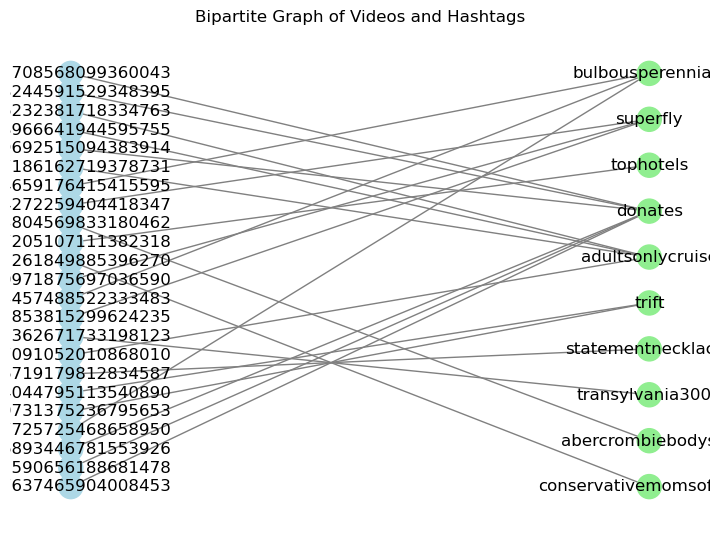

In [8]:
import matplotlib.pyplot as plt

#visualize 
plt.figure(figsize=(7, 5))
pos = nx.bipartite_layout(TGB, video_ids)  # Layout for bipartite graph
nx.draw(TGB, pos, with_labels=True, node_color=['lightblue' if node in video_ids else 'lightgreen' for node in TGB.nodes()], edge_color='gray')
plt.title("Bipartite Graph of Videos and Hashtags")
plt.show()

In [9]:
# projecting to a unipartite graph of hashtags
TG = nx.bipartite.weighted_projected_graph(TGB, hashtags, ratio=False) # TG = test graph
TG

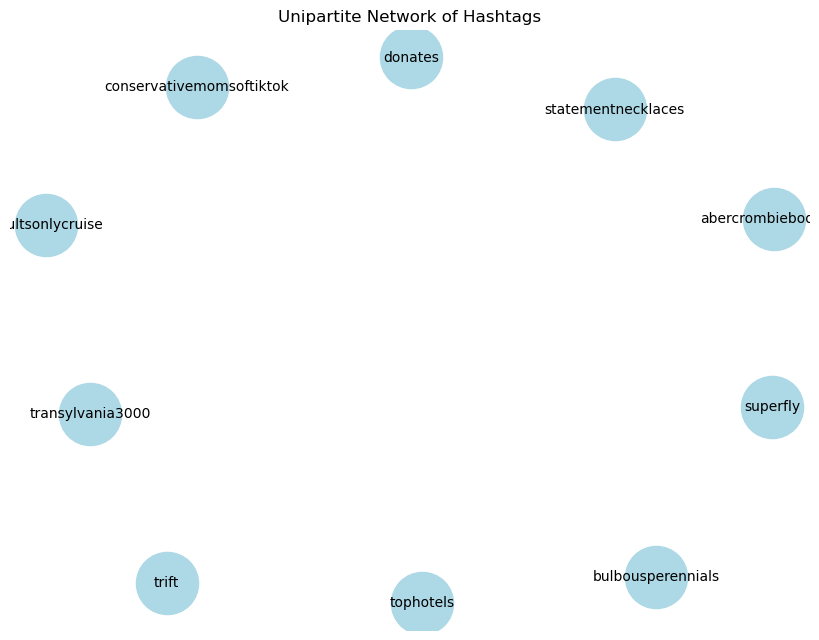

In [10]:
video_groups = filtered_df.groupby('id')['hashtag_names'].apply(list)

# Add edges between hashtags appearing in the same video
for hashtags in video_groups:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            TG.add_edge(hashtags[i], hashtags[j])

# Draw the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(TG)  # Layout for positioning
nx.draw(TG, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("Unipartite Network of Hashtags")
plt.show()